In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
hous_data = pd.read_csv("housingCalif.csv")
hous_data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [40]:
hous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [41]:
hous_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [42]:
hous_data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

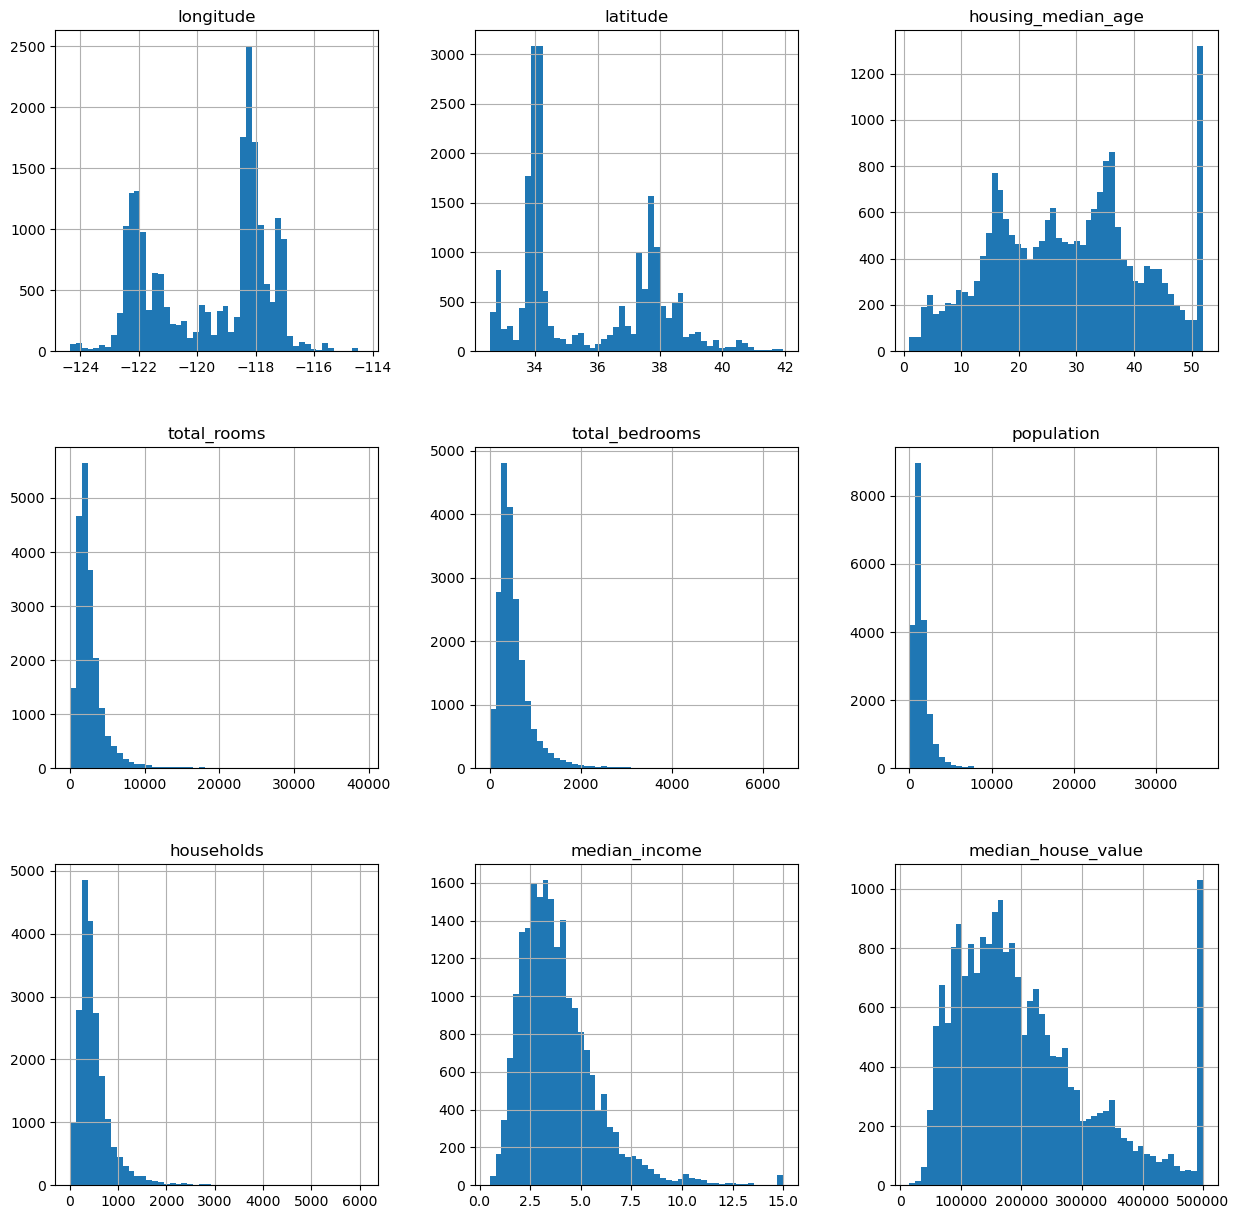

In [43]:
hous_data.hist(bins =50, figsize =(15,15))

<AxesSubplot:>

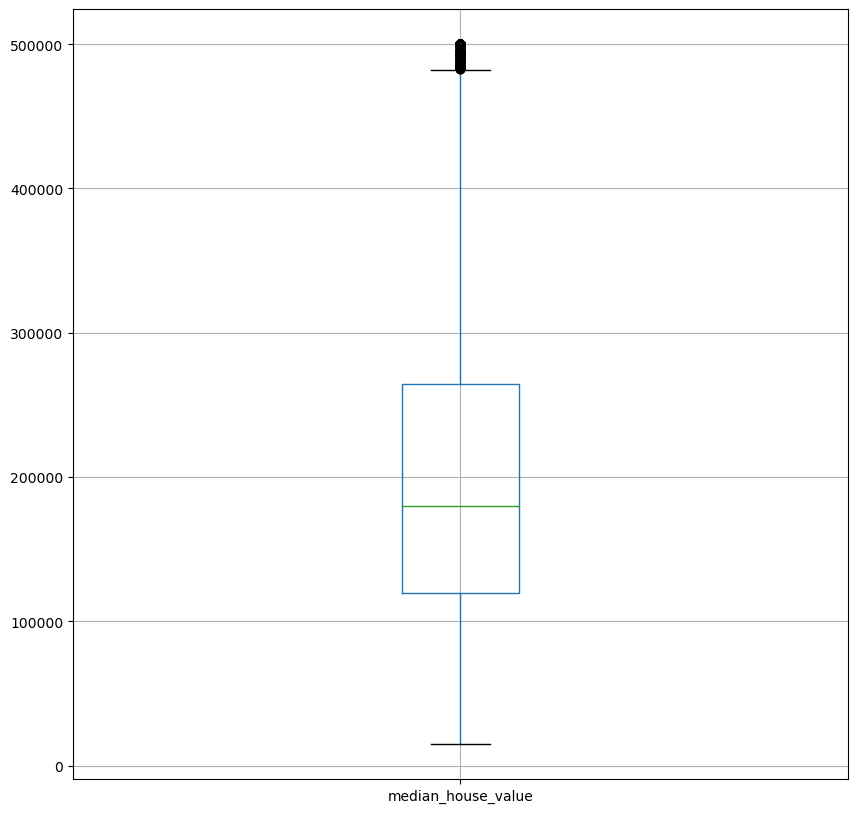

In [44]:
hous_data.boxplot(['median_house_value'], figsize=(10, 10))

<Figure size 640x480 with 0 Axes>

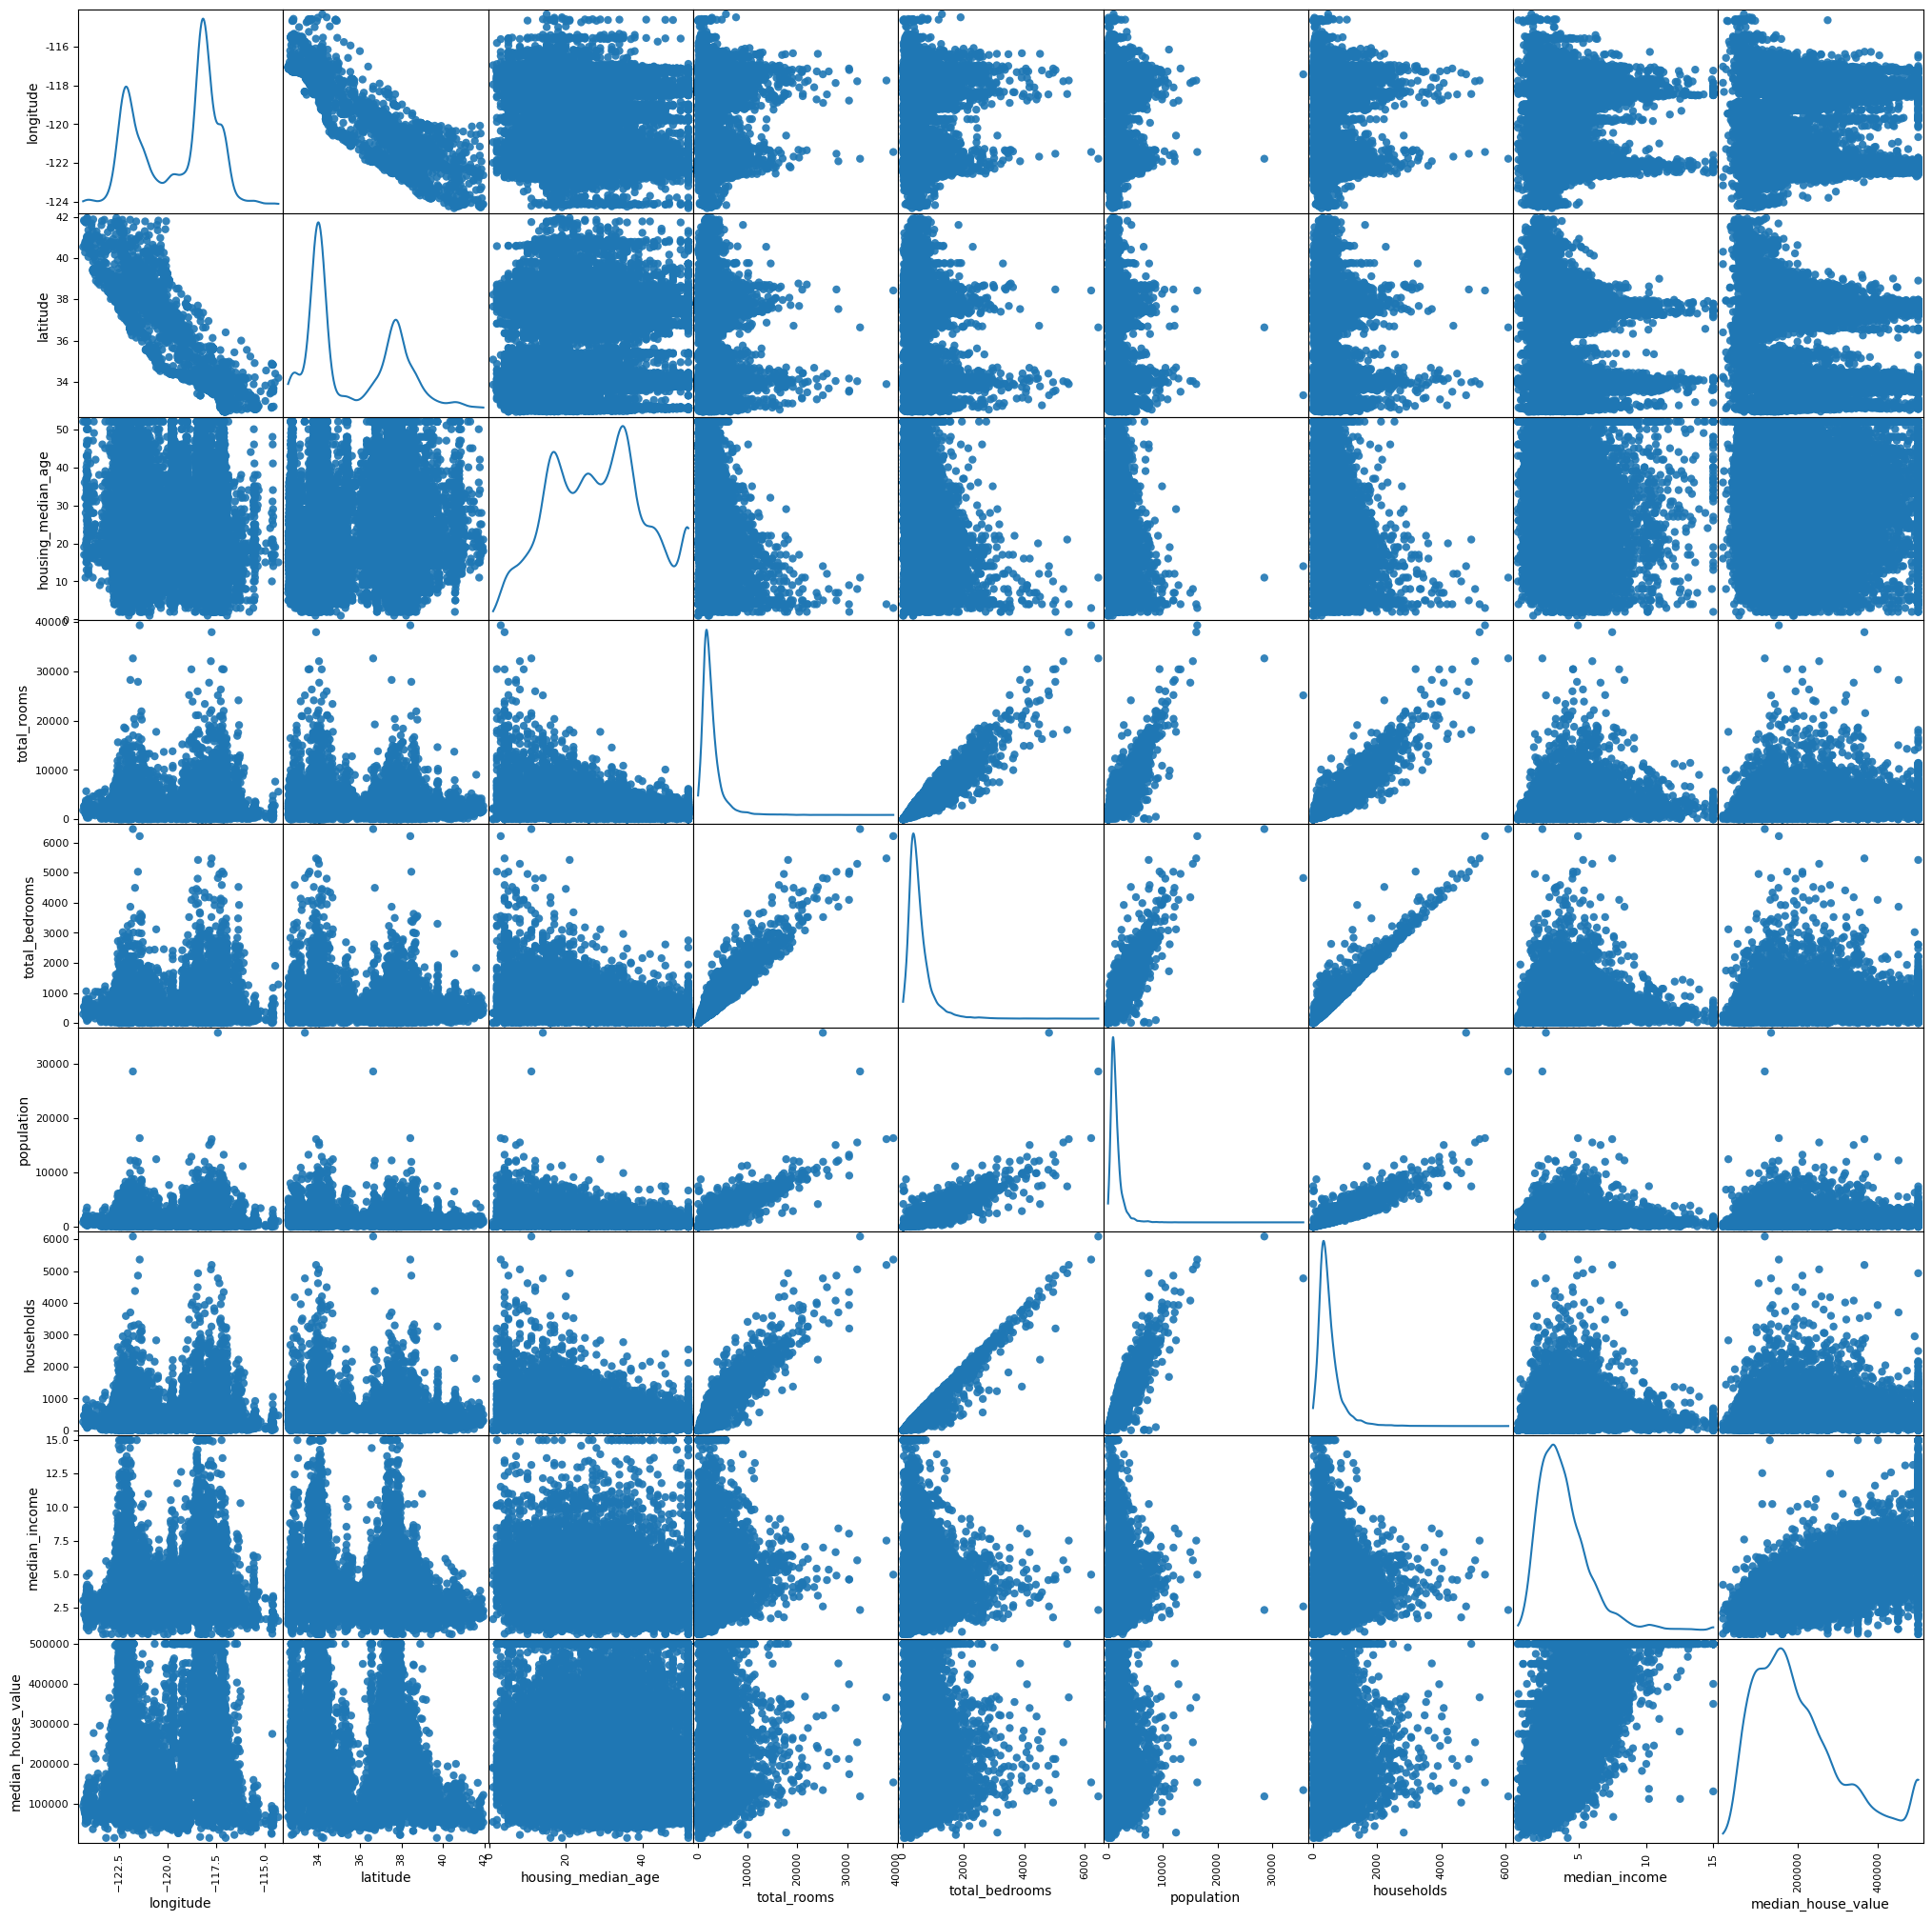

In [45]:
from pandas.plotting import scatter_matrix
fig=plt.figure()
scatter_matrix(hous_data, figsize =(25,25), alpha =0.9, diagonal = "kde", marker ="o");

In [46]:
hous_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Text(0.5, 1.0, 'Imbalanced Correlation Matrix')

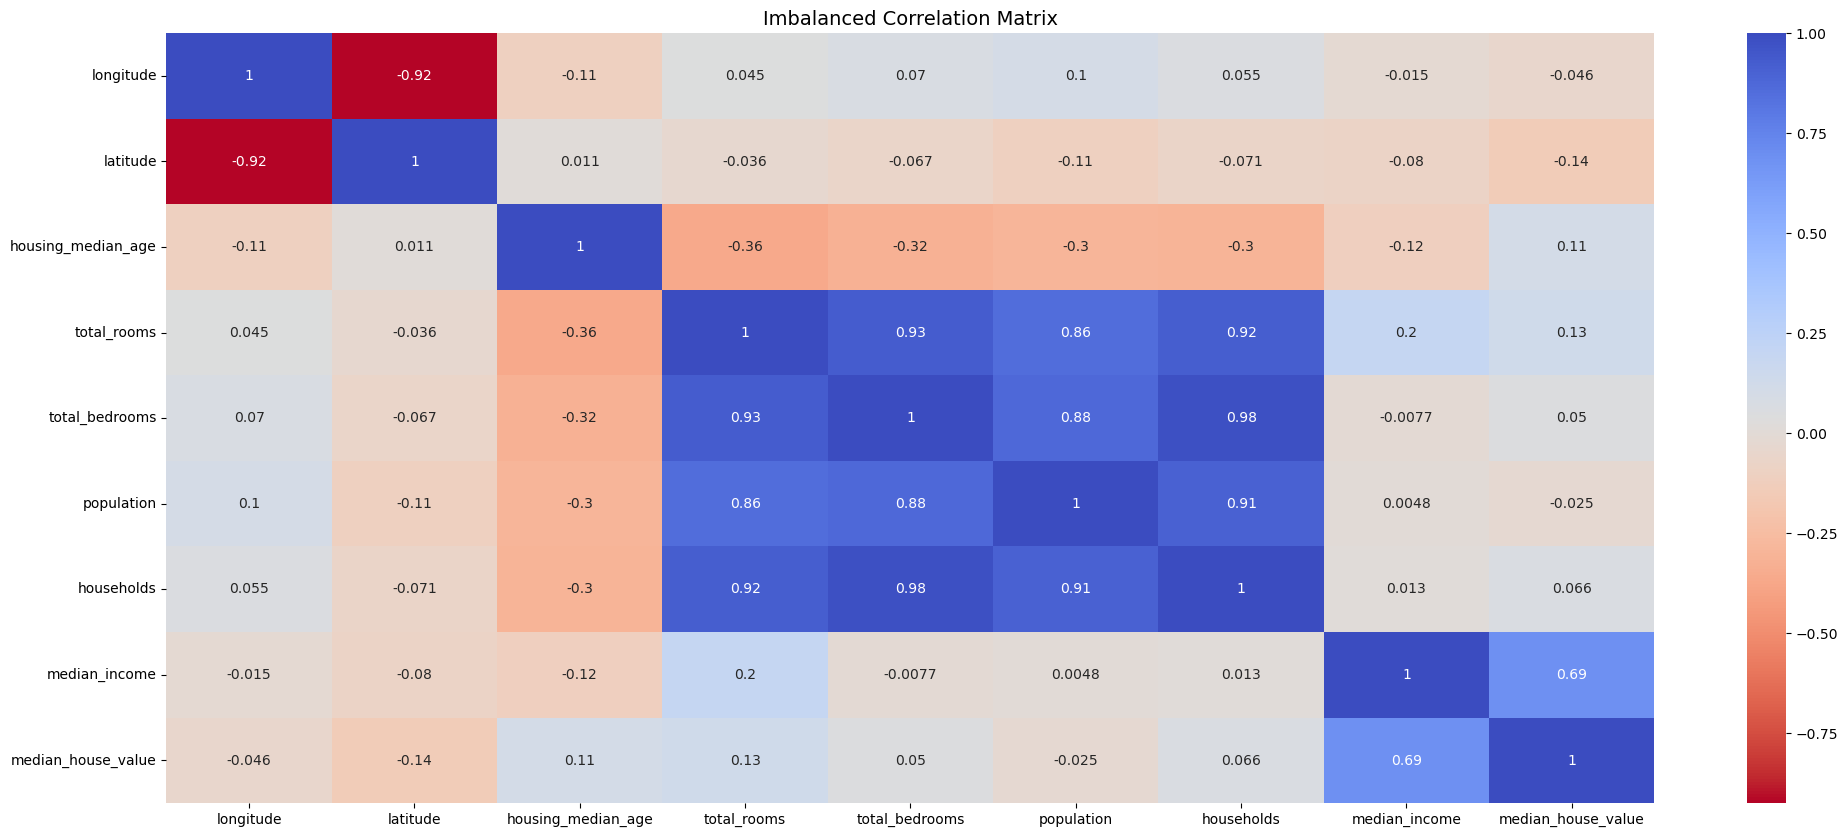

In [47]:
correl_2019 = hous_data.corr()
f, ax1 = plt.subplots(figsize = (24,10))
sns.heatmap(correl_2019, cmap ='coolwarm_r',annot=True, ax =ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

C:\Users\alokd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


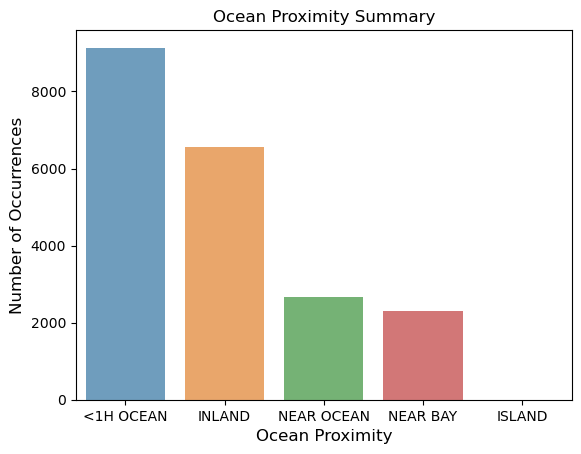

In [48]:
op_count=hous_data['ocean_proximity'].value_counts()
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.title('Ocean Proximity Summary')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.show()

In [50]:
#Converting Categorical data to numerical

In [51]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
hous_data['ocean_proximity'] = label_encoder.fit_transform(hous_data['ocean_proximity'])
hous_data['ocean_proximity'].head(5)

0    3
1    3
2    3
3    3
4    3
Name: ocean_proximity, dtype: int32

In [52]:
hous_data['ocean_proximity'].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [53]:
hous_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [55]:
#statistics for missing values
print("Total_bedrooms column Mode is " +str(hous_data['total_bedrooms'].mode())+"\n")

Total_bedrooms column Mode is 0    280.0
Name: total_bedrooms, dtype: float64



In [59]:
hous_data['total_bedrooms'].fillna(hous_data['total_bedrooms'].median())

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [64]:
hous_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [63]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy = 'median')
hous_data[['total_bedrooms']]=imputer.fit_transform(hous_data[['total_bedrooms']])

In [65]:
print(hous_data.iloc[:,4:5].head())

   total_bedrooms
0           129.0
1          1106.0
2           190.0
3           235.0
4           280.0


In [68]:
#Moving target feature to the last for our easiness
cols = hous_data.columns.to_list()
new_position = 10

cols.insert(new_position, cols.pop(cols.index('median_house_value')))
hous_data3 = hous_data[cols]
hous_data3.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0


In [72]:
#Split the dataset into 80% train and 20% test dataset
X = hous_data3.iloc[:,:-1]
Y =hous_data3.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state =42)

In [73]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train =std_scaler.fit_transform(X_train)
X_test =std_scaler.fit_transform(X_test)

# Perform Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs =-1)
model.fit(X_train, y_train)
y_pred =model.predict(X_test)

In [76]:
print("Intercept is "+str(model.intercept_))
print("Coeffiecient is "+str(model.coef_))

Intercept is 207194.69373788778
Coeffiecient is [-85854.94724101 -90946.06271148  14924.30655143 -17693.23405277
  48767.60670995 -43884.16852449  17601.31495096  77144.10164179
   -451.52015229]


In [81]:
print(len(y_pred))
print(len(y_test))
print(y_pred[0:5])
print(y_test[0:5])

4128
4128
[ 65216.38684803 156527.53293932 256036.43954845 267216.4238326
 269960.1247732 ]
20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64


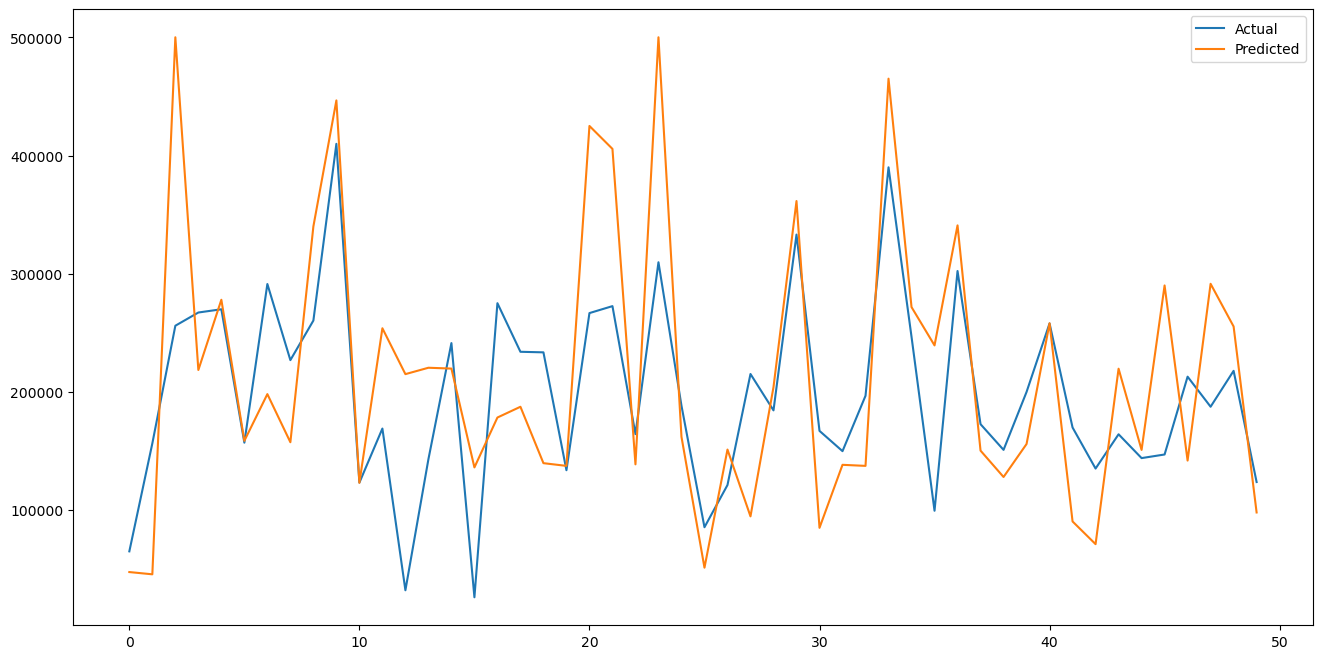

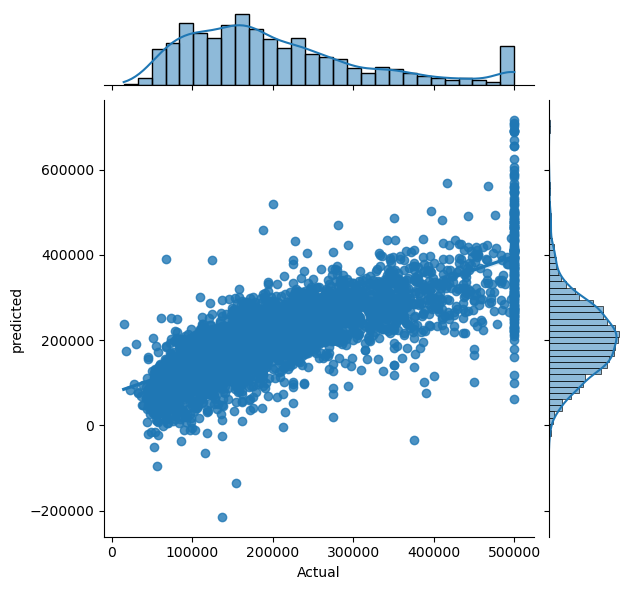

In [85]:
test =pd.DataFrame({'predicted':y_pred, 'Actual': y_test})
fig =plt.figure(figsize =(16,8))
test = test.reset_index()
test = test.drop(['index'], axis =1)
plt.plot(test[:50])
plt.legend(['Actual', 'Predicted'])
sns.jointplot(x='Actual', y ='predicted', data =test, kind ='reg')

# Root Mean Squared Error (RMSE)¶

In [87]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))

71210.1854214235
69361.0714290645


# Decision Tree Regression

In [89]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor(max_depth=9)
model2.fit(X_train, y_train)
y_pred2 =model2.predict(X_test)

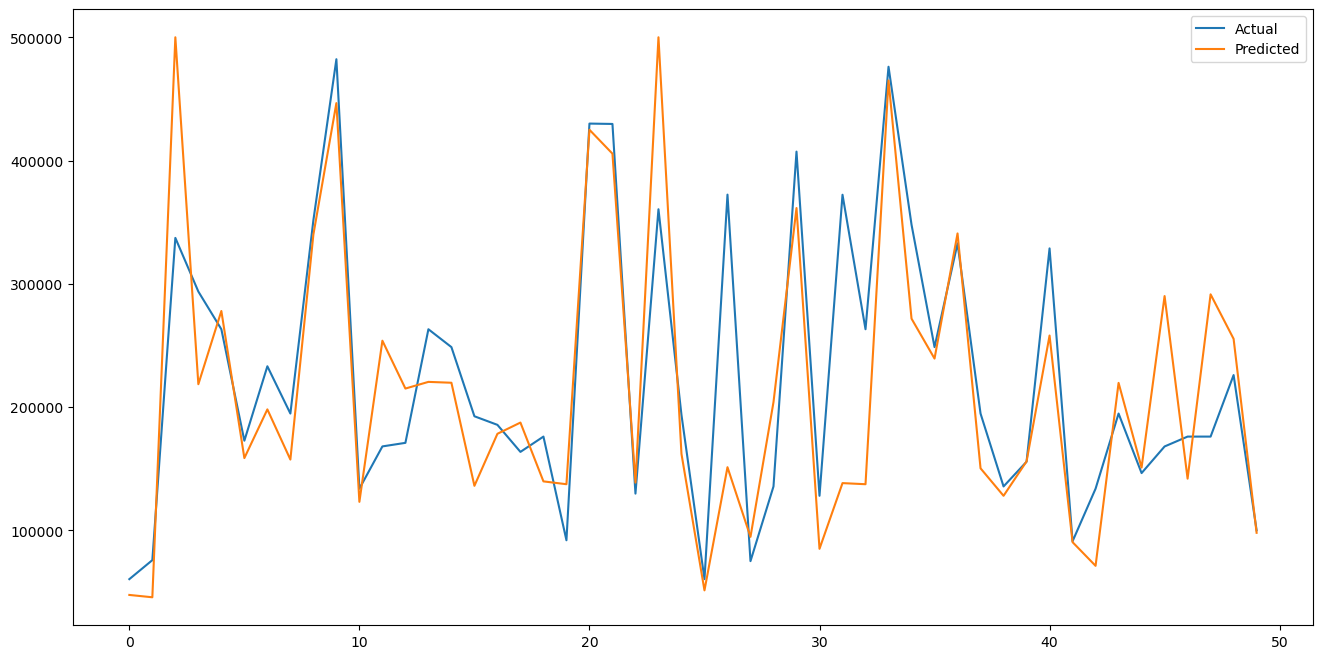

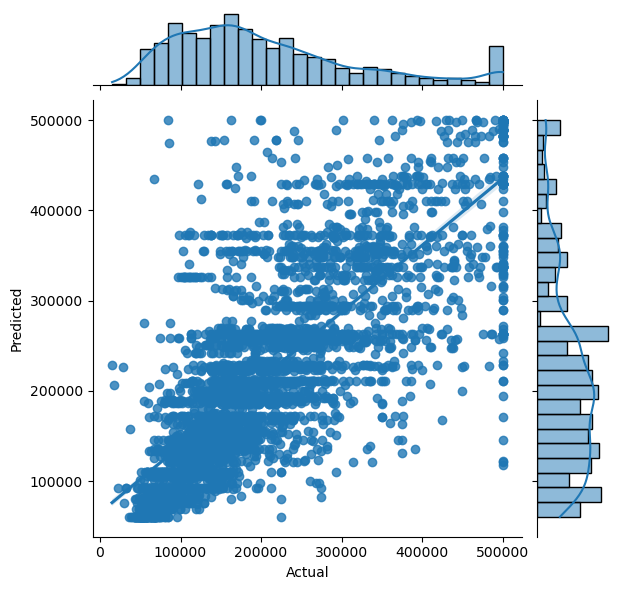

In [91]:
test = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

In [92]:
print(np.sqrt(mean_squared_error(y_test, y_pred2)))
print(np.sqrt(mean_squared_error(y_train, model2.predict(X_train))))

73947.17695238609
50465.528576088655


# RandomForestRegressor

In [93]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(30)
model3.fit(X_train, y_train)
y_pred3 =model3.predict(X_test)

In [94]:
print(np.sqrt(mean_squared_error(y_test, y_pred3)))
print(np.sqrt(mean_squared_error(y_train, model3.predict(X_train))))

63248.107334123066
19351.185417906298


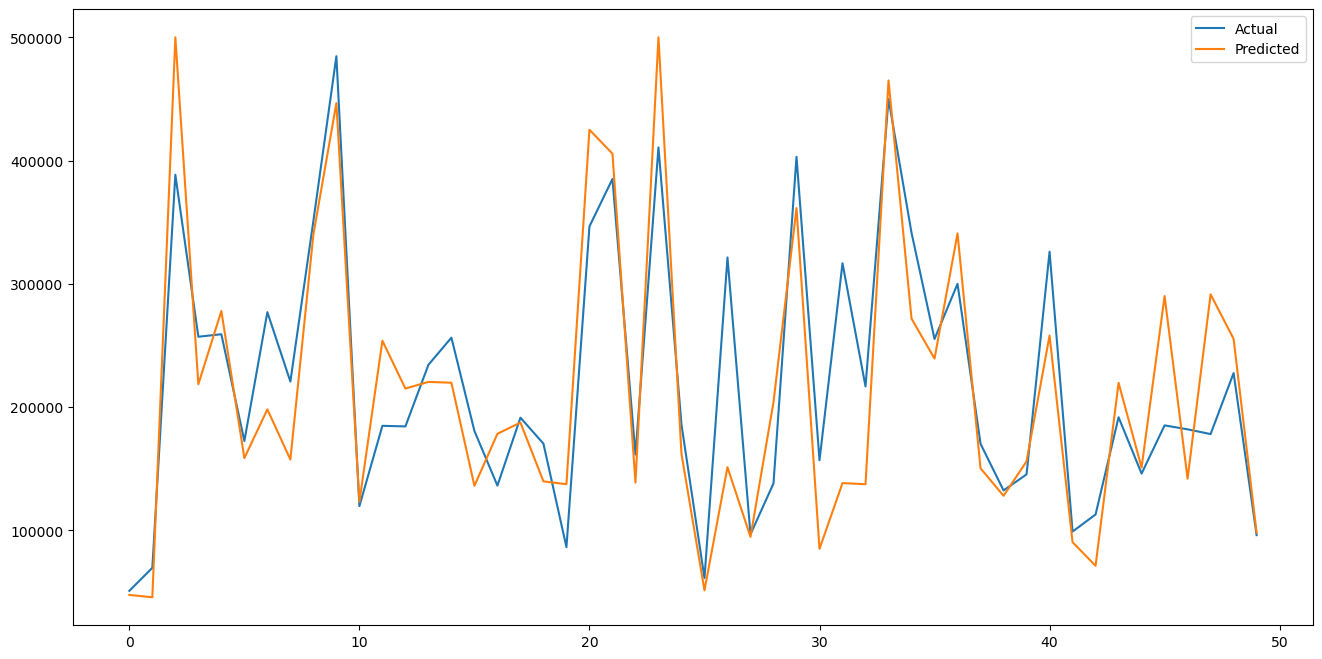

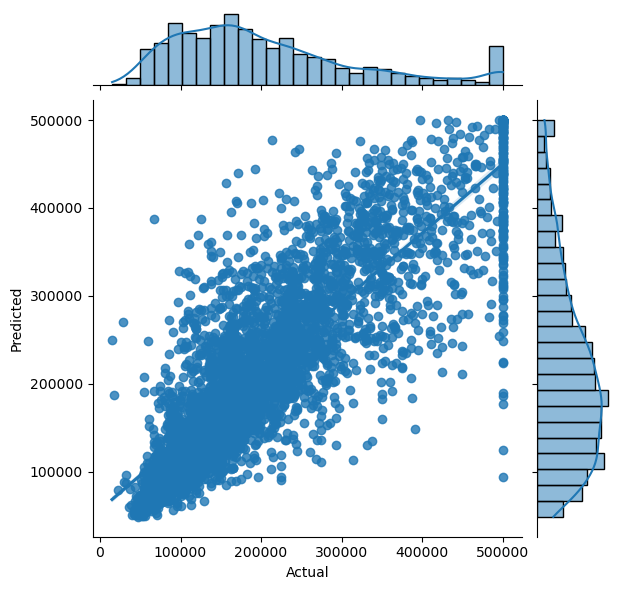

In [95]:
test = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")